In [1]:
import pandas as pd
import numpy as np

def calcData(sheet1):
    qp,cp=sheet1['Qualifying Marks'],sheet1['Current Course Percentage']
    qp.replace('Not Available',0.0,inplace=True)
    qp.fillna(0.0,inplace=True)
    cp.fillna(0.0,inplace=True)
    diff=cp-qp
    count=[0]*7
    for i in diff:
        if i>10:
            count[0]+=1
        elif i>5 and i<=10:
            count[1]+=1
        elif i<=5 and i>0:
            count[2]+=1
        elif i==0.0:
            count[3]+=1
        elif i<0 and i>=-5:
            count[4]+=1
        elif i<-5 and i>=-10:
            count[5]+=1
        elif i<-10:
            count[6]+=1
        else:
            print(i,'errorsome value')
    total=sum(count)
    countpercentage=[]
    for i in count:
        countpercentage.append(i*100/total)
    
    return (count,countpercentage)



xl=pd.ExcelFile('RAW FINAL CGPA Vs Package Report of 2018,2017,2016 (14-feb-18).xlsx')
sheet1=xl.parse(0)
sheet2=xl.parse(1)
sheet3=xl.parse(2)
count1,countp1=calcData(sheet1)
count2,countp2=calcData(sheet2)
count3,countp3=calcData(sheet3)
categories=[' ','More than 10% change','5 to 10% change','0 to 5% change','0% (No change)','0 to -5% change','-5 to -10% change', 'Less than -10% change']
total=sum(count1)
cp1=['% out of Total ('+str(total)+')']+countp1
total=sum(count2)
cp2=['% out of Total ('+str(total)+')']+countp2
total=sum(count3)
cp3=['% out of Total ('+str(total)+')']+countp3

c1=['No. of students']+count1
c2=['No. of students']+count2
c3=['No. of students']+count3
tabData=pd.DataFrame(np.column_stack([ c1, cp1,c2,cp2,c3,cp3]),
              columns=['2018','','2017','','2016',''],index=[categories])
print(tabData)

15069
                                  2018                         \
                       No. of students  % out of Total (5657)   
More than 10% change               590     10.429556301926816   
5 to 10% change                    467       8.25525897118614   
0 to 5% change                     648     11.454834718048435   
0% (No change)                       5      0.088386070355312   
0 to -5% change                    744     13.151847268870426   
-5 to -10% change                  707     12.497790348241118   
Less than -10% change             2496      44.12232632137175   

                                  2017                         \
                       No. of students  % out of Total (5009)   
More than 10% change               603     12.038331004192454   
5 to 10% change                    487      9.722499500898383   
0 to 5% change                     660     13.176282691155919   
0% (No change)                       4     0.0798562587342783   
0 to -5% change   

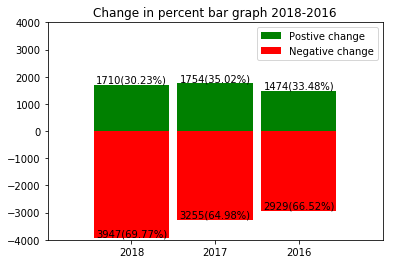

      Positive change  Positive Percentage  Negative change  \
2018           1710.0            30.228036           3947.0   
2017           1754.0            35.016969           3255.0   
2016           1474.0            33.477175           2929.0   

      Negative Percentage  
2018            69.771964  
2017            64.983031  
2016            66.522825  


In [6]:
import matplotlib.pyplot as plt

x=[1,2,3]
labels=['2018','2017','2016']
pdata=[]
ndata=[]
ndatap=[]
pdatap=[]

pdata.append(sum(count1[:4]))
ndata.append(sum(count1[4:]))
pdatap.append(sum(count1[:4])*100/sum(count1))
ndatap.append(sum(count1[4:])*100/sum(count1))


pdata.append(sum(count2[:4]))
ndata.append(sum(count2[4:]))
pdatap.append(sum(count2[:4])*100/sum(count2))
ndatap.append(sum(count2[4:])*100/sum(count2))


pdata.append(sum(count3[:4]))
ndata.append(sum(count3[4:]))
pdatap.append(sum(count3[:4])*100/sum(count3))
ndatap.append(sum(count3[4:])*100/sum(count3))
#print(pdata,pdatap,ndata,ndatap)
percentages=pdatap+ndatap
allData=pdata+ndata
ndata2=[ -x for x in ndata ]
fig = plt.figure()
ax = plt.subplot(111)
bar1=ax.bar(x, pdata, width=0.9, color='g',label='Postive change')
bar2=ax.bar(x, ndata2, width=0.9, color='r',label='Negative change')
plt.xticks(x,labels)
plt.legend()
j=0
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, str(allData[j])+'('+str(round(percentages[j],2))+'%)', ha='center', va='bottom')
    j+=1
plt.ylim(-4000,4000)
plt.xlim(0,4,0.5)
plt.title('Change in percent bar graph 2018-2016')
plt.savefig('3yrbarplot.png',transparent=True)
plt.show()
categories2=['2018','2017','2016']
tabData2=pd.DataFrame(np.column_stack([ pdata,pdatap,ndata,ndatap]),
    columns=['Positive change','Positive Percentage','Negative change','Negative Percentage'],index=[categories2]
              )
print(tabData2)



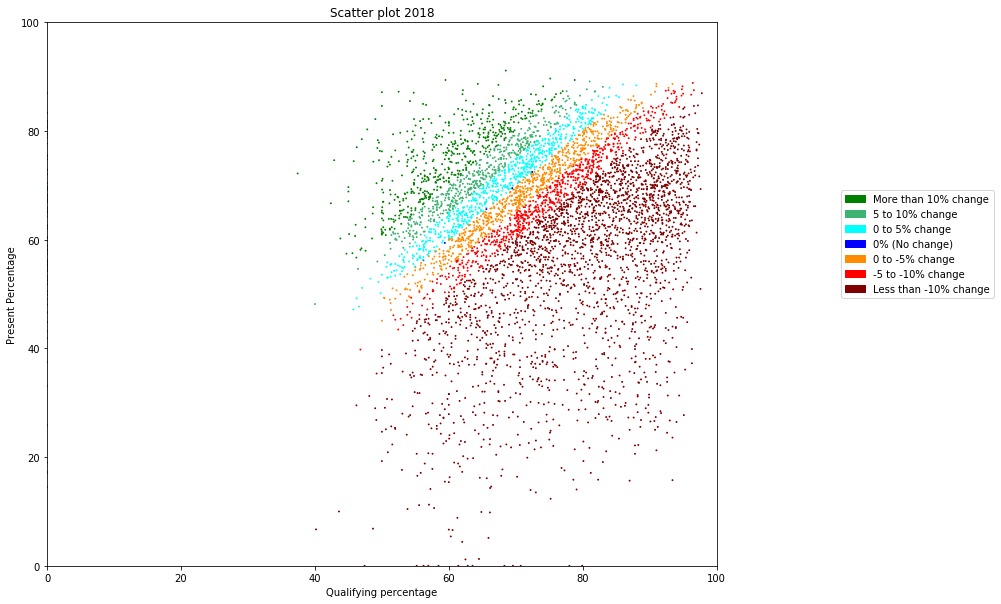

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

xl=pd.ExcelFile('RAW FINAL CGPA Vs Package Report of 2018,2017,2016 (14-feb-18).xlsx')
sheet1=xl.parse(0)
qp,cp=sheet1['Qualifying Marks'],sheet1['Current Course Percentage']
qp.replace('Not Available',0.0,inplace=True)
cp.replace('Not Available',0.0,inplace=True)
qp.fillna(0.0,inplace=True)
cp.fillna(0.0,inplace=True)
diff=cp-qp
colors=[]
categories=['More than 10% change','5 to 10% change','0 to 5% change','0% (No change)','0 to -5% change','-5 to -10% change', 'Less than -10% change']

    
for i in diff:
    if i>10:
        colors.append('g')
    elif i>5 and i<=10:
        colors.append('mediumseagreen')
    elif i<=5 and i>0:
        colors.append('aqua')
    elif i==0.0:
        colors.append('b')
    elif i<0 and i>=-5:
        colors.append('darkorange')
    elif i<-5 and i>=-10:
        colors.append('r')
    elif i<-10:
        colors.append('maroon')
    else:
        print(i,'errorsome value')

ucolors=['g','mediumseagreen','aqua','b','darkorange','r','maroon']

patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in zip(categories, ucolors)]
plt.figure(figsize=(12,10))
plt.scatter(qp,cp,c=colors,s=0.8)
lgd=plt.legend(patches, categories,loc=9, bbox_to_anchor=(1.3,0.7))
plt.xlabel('Qualifying percentage')
plt.ylabel('Present Percentage')
plt.title('Scatter plot 2018')
plt.xlim(0.0,100.0)
plt.ylim(0.0,100.0)
plt.savefig('scatter2018.png', bbox_extra_artists=(lgd,),transparent=True, bbox_inches='tight')
plt.show()
